In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir())

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['.ipynb_checkpoints', 'Bill Gates gets super lucky playing cards! - Netflix.mp4', 'camera.py', 'data', 'facemodel.py', 'FaceNet.ipynb', 'FaceNet_NewDataset.ipynb', 'haarcascades', 'main.py', 'models', 'mtcnn', 'mtcnn_detect.py', 'open_detect.py', 'templates', '__pycache__']


In [3]:
def load_data():
    X = np.load('data/image-facenet.npy',allow_pickle=True)
    y = np.load('data/label-facenet.npy',allow_pickle=True)

#     le = preprocessing.LabelEncoder()
#     le.fit(y)
    # print(le.classes_)

#     y = le.transform(y)
    # print(X.shape, y.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    np.savez_compressed('data/faces-dataset.npz', X_train, y_train, X_test, y_test)

#     return (X_train,y_train) , (X_test, y_test)

load_data()

In [4]:
# load the face dataset
data = np.load('data/faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (467, 160, 160, 3) (467,) (117, 160, 160, 3) (117,)


In [7]:
trainy[9]

'Sakib'

In [8]:
# load the facenet model
facenet_model = load_model('models/facenet_keras.h5')
print('Loaded Model')
facenet_model.summary()

Loaded Model
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________________________

c:\python36\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
#     print(sample.shape)
    # make prediction to get embedding
    yhat = model.predict(sample)
#     print(yhat[0].shape)
    return yhat[0]


# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)


# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)


# save arrays to one file in compressed format
# np.savez_compressed('10-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 3)
(1, 160, 160, 

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))

# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)

print(out_encoder.classes_)

Dataset: train=3192, test=798
['Aaron_Paul' 'Adam_Sandler' 'Adele' 'Alan_Rickman' 'Alexandra_Daddario'
 'Amanda_Crew' 'Angelina_Jolie' 'Arnold_Schwarzenegger' 'Ben_Affleck'
 'Benedict_Cumberbatch']


In [9]:
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=98.340, test=96.366


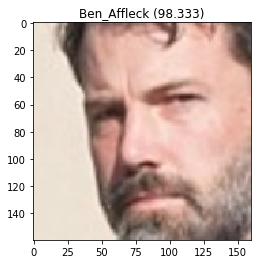

In [66]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
# print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
# print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

In [ ]:


from sklearn.externals import joblib

filename = 'models/facenet_svm_model.sav'
joblib.dump(model, filename)



In [ ]:
np.save('labels.npy',trainy)

In [ ]:
def get_embeddin(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
#     sample = np.expand_dims(face, axis=0)
    print(face.shape)
    # make prediction to get embedding
    yhat = model.predict(face)
#     print(yhat[0].shape)
    return yhat[0]



def face_recognition(img):
    # Read and process image for model
    # face_img = cv2.imread(img, 1)
    # face_img = img.astype('float32') / 255
    # rgb_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (160,160))

    img = np.reshape(img, (1,img.shape[0], img.shape[1], img.shape[2]))
    img_emd = np.asarray(get_embeddin(facenet_model,img)) # converting embedded image to numpy array if needed
    
#     print(img_emd.shape)
    img_emd = np.expand_dims(img_emd, axis=0)
    # Predicting Image
    img_norm = in_encoder.transform(img_emd)

    yhat_class = model.predict(img_norm)
    yhat_prob = model.predict_proba(img_norm)

    # Reverse Transform to Original label
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predict_names = out_encoder.inverse_transform(yhat_class)

    return predict_names[0], class_probability

In [ ]:
ben = cv2.imread("index.jpg")
print(ben.shape)

In [ ]:
face_recognition(ben)